# Final Project Part 3: Technical Notebook

**key:** <br>
1. Blue dotted line = Notes
2. Green dotted line = Main part of the document
3. Red dotted line = parts with major errors or irrelevant information like the appendix

<font color='blue'>------------------------------------------------------------------------------------------------------------------</font>

## Notes 

**There are three documents in this final project series:** <br>
1. Final Project Part 1&2_G_H <br>
2. Final Project Part 3_G_H (this document) <br>
3. Slides_Final_Project_Data_Graham_Herdman (My presentation) <br>

<font color = 'blue'> This is part 1 and 2 of my final project that I completed and presented during my 10-week data science course at General Assembly (May 2018 - July 2018) </font> 

<font color = 'blue'> In hindsight there are many errors that I made when making this final project for the first time <br>
<br>
**Notable errors:** <br>
<br>
**PART 2:** <br>
- **Not enough EDA:** This was my first time working with such a large data set so I had some trouble performing exploratory data analysis. I tried a wide array of techniques both before and after I accounted for missing values which unfortunately left the EDA section without much structure. In future projects I plan to make this section have a much more logical flow to it so that useful information can be accessed more quickly. <br> 
    
**PART 3:** <br>
- **Not accounting for confounding:** e.g. total_pymnt vs total_pymnt_inv. These two features were highly correlated with each other and therefore I should've choosen the most relevant feature (total_pymnt) and cut the other (total_pymnt_inv) in order to account for confounding variables in the data set. <br>  
- **Not using hyper parameter tuning with Random Forest:** Although I found logistic regression to be the most useful classification model for predicting whether a loan would default or not, I believe the Random Forest model was not given a fair chance since I did not optimize it's hyper parameters. </font>

<font color='blue'>------------------------------------------------------------------------------------------------------------------</font>

<font color='green'>------------------------------------------------------------------------------------------------------------------</font>

## 5) Clean Data: Data wrangling 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
# Read in the loans data and store it in a pandas DataFrame
loans = pd.read_csv('./lending-club-loan-data/loan.csv', low_memory=False)

### - MISSING VALUES

- Have a list of assumptions I made when dealing with missing values 
<br>

**General Assumptions** <br> 
1) All features with more than half of their data points as null could not provide sufficient information and were cut <br>
2) Numeric nan variables were filled with the average of the columns <br>
3) Categorical columns with missing values were replaced with other unless the column was a date or other didn't make sense for some reason. <br>
<br>
**Specific** <br>
1) earliest_cr_line, last_pymnt_d, last_credit_pull_d = dropped the rows with nans  <br>
2) next_pymnt_d = dropped the entire column since there were too many missing values, i.e. 1/4 of the values were missing  <br> 
<br>
**Irelevant columns** <br>
1) id <br>
2) member_id <br>
3) subgrade - too specific - simplicities sake<br>
4) url <br>
5) zip_code - too specific <br>
6) Date Columns - too many variables - too hard to work with <br>
<br>
7) emp_title - too many values <br>
8) title - too many values <br>
<br>
**Replacing Oridinal variables** <br>
ordinal variables have a grading to them so I am replacing them with integers <br>
<br>
**MAKING THE PREDICTION SET VECTOR** <br>
1) tried to make the proportion of positive and negatives similar <br>
2) Binary Classes <br>
- Default = Default + Charged-Off <br>
- Fully Paid = Fully Paid <br>


In [3]:
# saving original loan dataset
loans_2 = loans

**1. CUTTING FEATURES WITH TOO MANY MISSING VALUES**

In [4]:
# cutting half all variables with half missing values
# discard columns with more than 443690 null values

columns = loans_2.columns.tolist()
null_values = loans_2.isnull().sum().tolist()

for f in zip(columns, null_values):
    if f[1] >= 443690:
        print(f)
        loans_2.drop([f[0]], axis=1, inplace=True)
        
loans_2.head(5)

('desc', 761351)
('mths_since_last_delinq', 454312)
('mths_since_last_record', 750326)
('mths_since_last_major_derog', 665676)
('annual_inc_joint', 886868)
('dti_joint', 886870)
('verification_status_joint', 886868)
('open_acc_6m', 866007)
('open_il_6m', 866007)
('open_il_12m', 866007)
('open_il_24m', 866007)
('mths_since_rcnt_il', 866569)
('total_bal_il', 866007)
('il_util', 868762)
('open_rv_12m', 866007)
('open_rv_24m', 866007)
('max_bal_bc', 866007)
('all_util', 866007)
('inq_fi', 866007)
('total_cu_tl', 866007)
('inq_last_12m', 866007)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


**2. REPLACING NUMERIC NANS WITH AVERAGE OF THE COLUMN**

In [5]:
def myfillna(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna(series.mean())
    else:
        return series

In [6]:
# new dataframe for safety sake hahha
loans_3 = loans_2.apply(myfillna)

In [7]:
loans_3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,225.70261,139458.189336,32068.620045


In [8]:
loans_3.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      51462
emp_length                     44825
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                            152
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
inq_last_6mths                     0
o

**3. DROPPING SUPERFLUOUS COLUMNS**

In [9]:
# id
loans_3.drop(["id"], axis=1, inplace=True) 

In [10]:
# member_id
loans_3.drop(["member_id"], axis=1, inplace=True) 

In [11]:
# subgrade
loans_3.drop(["sub_grade"], axis=1, inplace=True)

In [12]:
# url
loans_3.drop(["url"], axis=1, inplace=True) 

In [13]:
# zip_code
loans_3.drop(["zip_code"], axis=1, inplace=True) 

In [14]:
# earliest_cr_line
loans_3.drop(["earliest_cr_line"], axis=1, inplace=True) 

In [15]:
# last_pymnt_d
loans_3.drop(["last_pymnt_d"], axis=1, inplace=True) 

In [16]:
# last_credit_pull_d
loans_3.drop(["last_credit_pull_d"], axis=1, inplace=True) 

In [17]:
# issue_d
loans_3.drop(["issue_d"], axis=1, inplace=True) 

**4. DEALING WITH CATEGORICAL MISSING VALUES**

**- Replacing Values**

**emp_title: Replace Missing values**
- The job title supplied by the Borrower when applying for the loan.

In [18]:
# fill in missing values of emp_title with other
loans_3.emp_title.fillna(value='other', inplace=True)

**emp_length: Replace Missing values**
- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [19]:
emp_length_dict = {'n/a':0,
                   '< 1 year':0,
                   '1 year':1,
                   '2 years':2,
                   '3 years':3,
                   '4 years':4,
                   '5 years':5,
                   '6 years':6,
                   '7 years':7,
                   '8 years':8,
                   '9 years':9,
                   '10+ years':10}

In [20]:
loans_3.emp_length.replace(emp_length_dict, inplace=True)

In [21]:
mean = float(int(loans_3.emp_length.mean()))

loans_3.emp_length.fillna(value=mean, inplace=True)

**title: Replace Missing values**
- The loan title provided by the borrower

In [22]:
# replace title nans with other
loans_3.title.fillna(value="other", inplace=True)

**- Dropping Columns**

**next_pymnt_d: Drop
column - too many missing values**

In [23]:
# drop the column 
loans_3.drop(["next_pymnt_d"], axis=1, inplace=True)

NO MORE NANs!

### - CLEANING DATA

**5. REPLACING ORDINAL VARIABLES**

In [24]:
cleanup_grade = {"A": 7, "B": 6, "C": 5, "D": 4, 
                                  "E": 3, "F": 2, "G": 1}

In [25]:
loans_3.grade.replace(cleanup_grade, inplace=True)

**6. REPLACING LOAN STATUS WITH TWO CLASSES**

In [26]:
loans_3.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [27]:
drop = True

In [28]:
if drop:
    loans_3 = loans_3[~loans_3['loan_status'].isin(['Current', 
                                                    'Late (31-120 days)', 'Issued',
                                                   'In Grace Period', 'Late (16-30 days)',
                                                   'Does not meet the credit policy. Status:Fully Paid',
                                                   'Does not meet the credit policy. Status:Charged Off'])] 
    

In [29]:
# replace all instances of a value in a column (must match entire value)
loans_3.loan_status.replace({'Charged Off': 'Default'}, inplace=True)

In [30]:
loans_3.loan_status.value_counts()

Fully Paid    207723
Default        46467
Name: loan_status, dtype: int64

In [31]:
# change the loan_status so that the defaults can be summed
loans_3["loan_status_num"] = loans_3.loan_status.apply(lambda x : 1 if x == "Default" else 0)


**7. REPLACING CATEGORICAL VARIABLES WITH DUMMY VARIABLES**

In [32]:
# Make a object dataframe
obj_df = loans_3.select_dtypes(include=['object']).copy()

In [33]:
obj_df.dtypes

term                   object
emp_title              object
home_ownership         object
verification_status    object
loan_status            object
pymnt_plan             object
purpose                object
title                  object
addr_state             object
initial_list_status    object
application_type       object
dtype: object

In [34]:
obj_columns = obj_df.columns.tolist()

for o in obj_columns:
    print()
    print(o)
    print(obj_df[o].value_counts())
    print()


term
 36 months    197373
 60 months     56817
Name: term, dtype: int64


emp_title
other                                   14011
Manager                                  1959
Teacher                                  1927
Supervisor                                863
Registered Nurse                          848
RN                                        844
Sales                                     685
Project Manager                           670
manager                                   590
Office Manager                            571
Driver                                    543
Director                                  508
Engineer                                  471
Owner                                     468
US Army                                   458
General Manager                           450
teacher                                   396
driver                                    384
Vice President                            380
Accountant                               

From this emp_title and title are too big and need to be dropped

In [35]:
# drop emp_title
loans_3.drop(["emp_title"], axis=1, inplace=True)

In [36]:
# drop title
loans_3.drop(["title"], axis=1, inplace=True)

**- REMOVE HIGHLY CORRELATED VARIABLES**

In [37]:
# Recoveries is the amount recovered after a charge off so will only be related to charge off 
# classes
loans_3.drop(["recoveries"], axis=1, inplace=True)

In [38]:
loans_3.drop(["collection_recovery_fee"], axis=1, inplace=True)

**- Making Dummy Variables**

In [39]:
# new dataframe to be safe
loans_4 = pd.get_dummies(loans_3)

In [40]:
# drop dummies for loan_status
loans_4.drop(["loan_status_Fully Paid"], axis=1, inplace=True)

In [41]:
# drop dummies for loan_status
loans_4.drop(["loan_status_Default"], axis=1, inplace=True)

## 6) Normalise and Scale

In [42]:
loans_4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,5000.0,5000.0,4975.0,10.65,162.87,6,10.0,24000.0,27.65,0.0,...,0,0,0,0,0,0,1,0,1,0
1,2500.0,2500.0,2500.0,15.27,59.83,5,0.0,30000.0,1.00,0.0,...,0,0,0,0,0,0,1,0,1,0
2,2400.0,2400.0,2400.0,15.96,84.33,5,10.0,12252.0,8.72,0.0,...,0,0,0,0,0,0,1,0,1,0
3,10000.0,10000.0,10000.0,13.49,339.31,5,10.0,49200.0,20.00,0.0,...,0,0,0,0,0,0,1,0,1,0
5,5000.0,5000.0,5000.0,7.90,156.46,7,3.0,36000.0,11.20,0.0,...,0,0,0,0,0,0,1,0,1,0


In [43]:
loans_4_columns = loans_4.columns.tolist()

loans_4_columns.remove('loan_status_num')

In [44]:
# scale and normalize
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

loans_4[loans_4_columns] = scale.fit_transform(loans_4[loans_4_columns].as_matrix())

In [45]:
loans_4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,-1.053756,-1.051684,-1.040981,-0.709800,-1.042836,0.599492,1.172848,-0.825215,1.422752,-0.337469,...,-0.179927,-0.041117,-0.154645,-0.110968,-0.067208,-0.048764,0.625251,-0.625251,0.001983,-0.001983
1,-1.361132,-1.359907,-1.345429,0.339228,-1.463558,-0.147896,-1.644461,-0.723148,-1.996380,-0.337469,...,-0.179927,-0.041117,-0.154645,-0.110968,-0.067208,-0.048764,0.625251,-0.625251,0.001983,-0.001983
2,-1.373427,-1.372236,-1.357730,0.495901,-1.363522,-0.147896,1.172848,-1.025060,-1.005922,-0.337469,...,-0.179927,-0.041117,-0.154645,-0.110968,-0.067208,-0.048764,0.625251,-0.625251,0.001983,-0.001983
3,-0.439005,-0.435237,-0.422859,-0.064943,-0.322414,-0.147896,1.172848,-0.396536,0.441275,-0.337469,...,-0.179927,-0.041117,-0.154645,-0.110968,-0.067208,-0.048764,0.625251,-0.625251,0.001983,-0.001983
5,-1.053756,-1.051684,-1.037906,-1.334221,-1.069009,1.346879,-0.799269,-0.621082,-0.687744,-0.337469,...,-0.179927,-0.041117,-0.154645,-0.110968,-0.067208,-0.048764,0.625251,-0.625251,0.001983,-0.001983


## 7) Balanced Positive and Negative Distribution

**- DROP FULLY PAID SAMPLES SO THAT WE GET A 50/50 SPLIT OF POSITIVE AND NEGATIVE**

In [46]:
loans_5 = loans_4.copy(deep=True)

In [47]:
loans_4.loan_status_num.value_counts()

0    207723
1     46467
Name: loan_status_num, dtype: int64

In [48]:
# Rename the index
loans_5.index = list(range(len(loans_5.index.tolist())))

In [49]:
# Randomly drop fully paid rows until the positive and negative values have a 50/50 split
import random

d_nd = loans_5.loan_status_num.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

# number of positive samples to drop
drop_num = int(math.fabs(d_nd[1]-d_nd[0]))
drop_num

fully_paid_indicies = loans_5[loans_5.loan_status_num == 0].index.tolist()

random_drop = random.sample(fully_paid_indicies, drop_num)

loans_5.drop(loans_5.index[random_drop], inplace=True, axis=0)

loans_5.loan_status_num.value_counts()


1    46467
0    46467
Name: loan_status_num, dtype: int64

In [50]:
# all columns without loan_status_num and loan_status
X = loans_5.drop(['loan_status_num'], axis=1)
# loan_status_num column
y = loans_5.loan_status_num

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

## 8) Test, Train, Split 

In [51]:
from sklearn.model_selection import train_test_split

# all columns without loan_status_num and loan_status
X = loans_5.drop(['loan_status_num'], axis=1)
# loan_status_num column
y = loans_5.loan_status_num

X_train, X_test, y_train, y_test = train_test_split(X,y)

## 9) Select Model Features 

In [52]:
loans_5.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status_num',
 'term_ 36 months',
 'term_ 60 months',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'pymnt_plan_n',
 'pymnt_plan_y',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_house',
 'purpos

## 10) Kfolds 

Didn't have time to implement

## 11) Build Models 
- 50% BASELINE - UNDER SAMPLING FULLY PAID CLASS

### Logistic Regression

In [53]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
rand_state = 8

LR = LogisticRegression(random_state=rand_state, 
                        class_weight = 'balanced', C=100)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

model_score = LR.score(X_test, y_test)
model_score

0.9937591460790222

In [54]:
loans_5.loan_status_num.value_counts()

1    46467
0    46467
Name: loan_status_num, dtype: int64

In [55]:
d_nd = loans_5.loan_status_num.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = non_default/(non_default + defaults)
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))

The baseline for the model is 0.5000 and the model scored 0.9938
So the model exceeded the baseline by 0.4938


In [124]:
# Examine the coefficient 
feature_cols = X.columns.tolist()
coefficients = LR.coef_.tolist()[0]

features = list(zip(feature_cols, coefficients))

sorted_features = sorted(features, key=lambda x: x[1]) 


new = []
for i in sorted_features:
    if i[1] < 0:
        new.append((i[0], math.fabs(i[1])))
    else:
        new.append(i)
    
new = sorted(new, key=lambda x: x[1], reverse=True)
  
print("ABSOLUTE VALUES")
c = 0
dummy = []
for i in new:
    print(i)
    dummy.append(i[0])
    c += 1
    if c >= 5:
        break
        
print()

print("NEGATIVES INCLUDED")
c = 0
for i in sorted_features:
    if i[0] in dummy:
        print(i)

ABSOLUTE VALUES
('total_rec_prncp', 100.52712130914482)
('total_pymnt', 69.24895576073594)
('funded_amnt', 38.71557374935408)
('total_pymnt_inv', 21.650938765209734)
('funded_amnt_inv', 21.194902893744494)

NEGATIVES INCLUDED
('total_rec_prncp', -100.52712130914482)
('funded_amnt_inv', -21.194902893744494)
('total_pymnt_inv', 21.650938765209734)
('funded_amnt', 38.71557374935408)
('total_pymnt', 69.24895576073594)


**- Confusion Matrix**

In [57]:
from sklearn import metrics

In [58]:
# Get probability predictions.
logit_pred_proba_LR = LR.predict_proba(X_test)[:,1]

In [59]:
confusion_matrix_LR = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_LR > .5)

In [60]:
print('TN =', confusion_matrix_LR[0][0], 'FP =', confusion_matrix_LR[0][1])
print('FN =', confusion_matrix_LR[1][0], 'TP =', confusion_matrix_LR[1][1])

TN = 11628 FP = 8
FN = 137 TP = 11461


**- f1 Score**

In [61]:
from sklearn.metrics import classification_report

predictions = LR.predict(X_test)

print(classification_report(y_test, predictions, target_names=loans_3.loan_status.unique().tolist()))

             precision    recall  f1-score   support

 Fully Paid       0.99      1.00      0.99     11636
    Default       1.00      0.99      0.99     11598

avg / total       0.99      0.99      0.99     23234



### Random Forest

In [62]:
# mean squared error
# log loss
# hyper parameter tuning for random forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier
rand_state = 8

rf = RandomForestClassifier(random_state=rand_state, n_estimators=30, max_depth=5, class_weight='balanced')

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

model_score = rf.score(X_test, y_test)
model_score

0.9450804854953947

In [64]:
loans_5.loan_status_num.value_counts()

1    46467
0    46467
Name: loan_status_num, dtype: int64

In [65]:
d_nd = loans_5.loan_status_num.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = non_default/(non_default + defaults)
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))

The baseline for the model is 0.5000 and the model scored 0.9451
So the model exceeded the baseline by 0.4451


In [66]:
# Get probability predictions.
logit_pred_proba_rf = rf.predict_proba(X_test)[:,1]

**- Confusion Matrix**

In [67]:
confusion_matrix_rf = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_rf > .5)

In [68]:
print('TN =', confusion_matrix_rf[0][0], 'FP =', confusion_matrix_rf[0][1])
print('FN =', confusion_matrix_rf[1][0], 'TP =', confusion_matrix_rf[1][1])

TN = 10930 FP = 706
FN = 570 TP = 11028


**- f1 Score**

In [69]:
from sklearn.metrics import classification_report

predictions = rf.predict(X_test)

print(classification_report(y_test, predictions, target_names=loans_3.loan_status.unique().tolist()))

             precision    recall  f1-score   support

 Fully Paid       0.95      0.94      0.94     11636
    Default       0.94      0.95      0.95     11598

avg / total       0.95      0.95      0.95     23234



<font color='green'>------------------------------------------------------------------------------------------------------------------</font>

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

-------------------------------------------------------------------

<font color='red'>------------------------------------------------------------------------------------------------------------------</font>

# Appendix - Mostly Rubbish

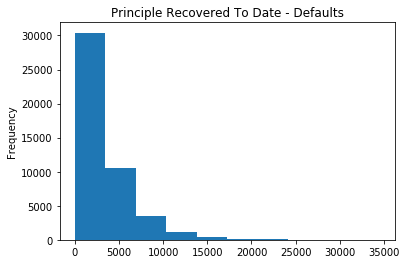

In [163]:
loans_3['total_rec_prncp'][(loans_3.loan_status_num == 1)].plot(kind='hist', 
                                                                title='Principle Recovered To Date - Defaults');

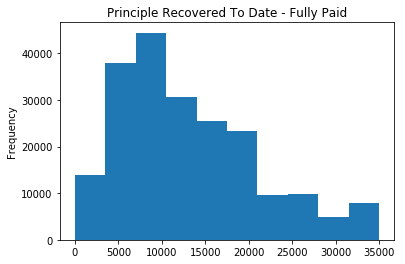

In [162]:
loans_3['total_rec_prncp'][(loans_3.loan_status_num == 0)].plot(kind='hist', 
                                                                title='Principle Recovered To Date - Fully Paid');

**- Exploring Data**

Top 10 features used in the logistic regression <br>
FEATURES <br>
('total_rec_prncp', 100.52712130914482) <br>
('total_pymnt', 69.24895576073594) <br>
('funded_amnt', 38.71557374935408) <br>
('total_pymnt_inv', 21.650938765209734) <br>
('funded_amnt_inv', 21.194902893744494) <br>
('total_rec_int', 19.63516619061637) <br>
('last_pymnt_amnt', 14.981190207599589) <br>
('out_prncp', 5.188384485318477) <br>
('out_prncp_inv', 5.18437866598246) <br>
('tot_coll_amt', 1.4877078078490233) <br>

In [85]:
dummy

['total_rec_prncp',
 'total_pymnt',
 'funded_amnt',
 'total_pymnt_inv',
 'funded_amnt_inv',
 'total_rec_int',
 'last_pymnt_amnt',
 'out_prncp',
 'out_prncp_inv',
 'tot_coll_amt']

In [127]:
loans_6 = loans_3.copy(deep=True)

loans_6.rename({'total_rec_prncp': 'total recovered principle', 'total_pymnt': 'total payment', 
                'funded_amnt': 'funded amount','total_pymnt_inv':'total payment investors',
                'funded_amnt_inv':'funded amount investors','total_rec_int':'total recovered interest',
                'last_pymnt_amnt':'last payment amount', 'out_prncp':'outstanding principle',
                'out_prncp_inv': 'outstanding principle investors','tot_coll_amt':'total collection amount'}, inplace=True, 
              axis=1)

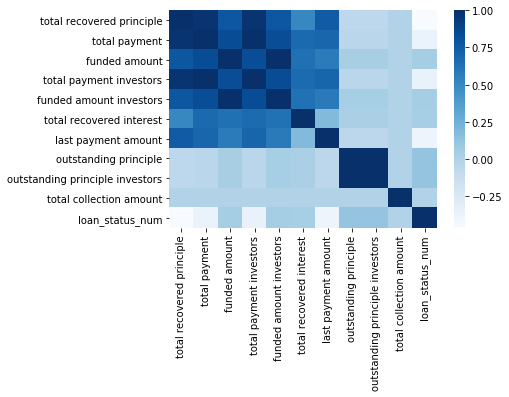

In [129]:
# Heat map of the top 10 features used in the logistic regression and loan_status_num


top_features_1 = ['total recovered principle', 'total payment', 'funded amount', 
                'total payment investors','funded amount investors','total recovered interest',
                'last payment amount','outstanding principle','outstanding principle investors',
                  'total collection amount', 'loan_status_num']

top_features_df = loans_6[top_features_1]

sns.heatmap(top_features_df.corr(), cmap='Blues');

In [113]:
feat = []
for x in dummy:
    print('\'{}\','.format(x), end=" ")

'total_rec_prncp', 'total_pymnt', 'funded_amnt', 'total_pymnt_inv', 'funded_amnt_inv', 'total_rec_int', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'tot_coll_amt', 'installment', 'annual_inc', 'int_rate', 'total_rec_late_fee', 'term_ 60 months', 'term_ 36 months', 'grade', 'inq_last_6mths', 'total_rev_hi_lim', 'acc_now_delinq', 'addr_state_DE', 'home_ownership_NONE', 'dti', 'addr_state_VA', 'addr_state_ND', 'addr_state_MS', 'addr_state_GA', 'tot_cur_bal', 'purpose_credit_card', 'revol_bal', 'addr_state_MT', 'addr_state_MN', 'addr_state_WY', 'addr_state_IN', 'initial_list_status_w', 'initial_list_status_f', 'addr_state_VT', 'addr_state_PA', 'addr_state_WA', 'addr_state_ME', 'addr_state_SD', 'purpose_medical', 'addr_state_CT', 'addr_state_HI', 'home_ownership_MORTGAGE', 'addr_state_NY', 'home_ownership_RENT', 'addr_state_RI', 'purpose_small_business', 'addr_state_SC', 'pub_rec', 'emp_length', 'addr_state_DC', 'addr_state_LA', 'addr_state_NV', 'addr_state_TN', 'verification_status_No

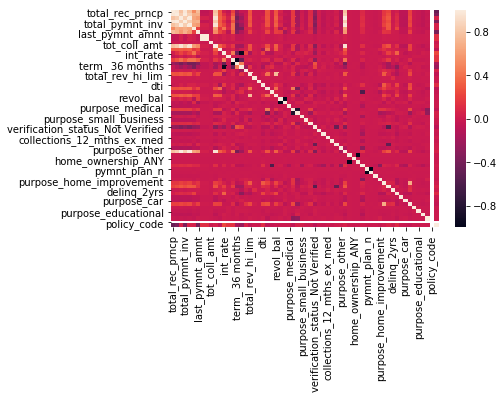

In [118]:
# Heat map of the top 10-20 features used in the logistic regression and loan_status_num
top_features_2 = ['total_rec_prncp', 'total_pymnt', 'funded_amnt', 'total_pymnt_inv',
                  'funded_amnt_inv', 'total_rec_int', 'last_pymnt_amnt', 'out_prncp',
                  'out_prncp_inv', 'tot_coll_amt', 'installment', 'annual_inc', 'int_rate',
                  'total_rec_late_fee', 'term_ 60 months', 'term_ 36 months', 'grade',
                  'inq_last_6mths', 'total_rev_hi_lim', 'acc_now_delinq',
                  'home_ownership_NONE', 'dti','tot_cur_bal', 'purpose_credit_card',
                  'revol_bal','initial_list_status_w', 'initial_list_status_f',
                  'purpose_medical','home_ownership_MORTGAGE','home_ownership_RENT', 
                  'purpose_small_business','pub_rec','emp_length', 'verification_status_Not Verified', 
                  'purpose_house','purpose_major_purchase', 'collections_12_mths_ex_med',
                  'purpose_wedding', 'verification_status_Source Verified',
                  'purpose_other', 'loan_amnt','application_type_INDIVIDUAL', 'home_ownership_ANY',
                  'application_type_JOINT','purpose_debt_consolidation', 'pymnt_plan_n', 'pymnt_plan_y',
                  'purpose_renewable_energy','purpose_home_improvement','open_acc',
                  'verification_status_Verified', 'delinq_2yrs', 'revol_util',
                  'purpose_vacation','purpose_car','total_acc',
                  'home_ownership_OTHER', 'purpose_educational', 'purpose_moving', 'home_ownership_OWN',
                  'policy_code','loan_status_num']

top_features_df_2 = loans_4[top_features_2]

sns.heatmap(top_features_df_2.corr())

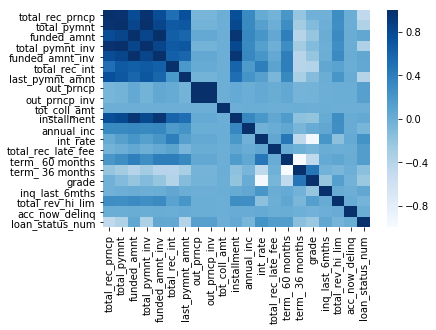

In [123]:
top_features_3 = dummy + ['loan_status_num']

top_features_df_2 = loans_4[top_features_3]

sns.heatmap(top_features_df_2.corr(), cmap='Blues');

## Modeling - 77% BASELINE

### Logistic Regression model - all columns - only two classes of loan_status

**- Run the Model**

In [44]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
rand_state = 8

LR = LogisticRegression(random_state=rand_state, class_weight = 'balanced')

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

model_score = LR.score(X_test, y_test)
model_score

0.9969157172531

In [45]:
loans_4.loan_status_num.value_counts()

0    207723
1     46467
Name: loan_status_num, dtype: int64

In [46]:
d_nd = loans_4.loan_status_num.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = 1 - defaults/non_default
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))

The baseline for the model is 0.7763 and the model scored 0.9969
So the model exceeded the baseline by 0.2206


In [47]:
# Examine the coefficient 
feature_cols = X.columns.tolist()
coefficients = LR.coef_.tolist()[0]

features = list(zip(feature_cols, coefficients))

sorted_features = sorted(features, key=lambda x: x[1]) 


new = []
for i in sorted_features:
    if i[1] < 0:
        new.append((i[0], math.fabs(i[1])))
    else:
        new.append(i)
    
new = sorted(new, key=lambda x: x[1], reverse=True)
  
print("ABSOLUTE VALUES")
c = 0
dummy = []
for i in new:
    print(i)
    dummy.append(i[0])
    c += 1
    if c >=5:
        break
        
print()

print("NEGATIVES INCLUDED")
c = 0
for i in sorted_features:
    if i[0] in dummy:
        print(i)

ABSOLUTE VALUES
('recoveries', 21.923071806465302)
('last_pymnt_amnt', 12.338782879701846)
('total_rec_prncp', 9.195851039667803)
('funded_amnt', 8.468438186287646)
('collection_recovery_fee', 7.0359248836105595)

NEGATIVES INCLUDED
('last_pymnt_amnt', -12.338782879701846)
('total_rec_prncp', -9.195851039667803)
('collection_recovery_fee', 7.0359248836105595)
('funded_amnt', 8.468438186287646)
('recoveries', 21.923071806465302)


**Results**

1) The Top 5 features are not categorical, all my hard work in vain! <br>
2) The model massive exceeded my baseline of 80% accuracy however this could be because there were so few defaults <br>
3) However it did exceed the baselien <br>

**- Confusion Matrix**

In [48]:
from sklearn import metrics

In [49]:
# Get probability predictions.
logit_pred_proba_LR = LR.predict_proba(X_test)[:,1]

In [50]:
confusion_matrix_LR = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_LR > .5)

In [51]:
print('TN =', confusion_matrix_LR[0][0], 'FP =', confusion_matrix_LR[0][1])
print('FN =', confusion_matrix_LR[1][0], 'TP =', confusion_matrix_LR[1][1])

TN = 51823 FP = 87
FN = 109 TP = 11529


### Random Forest

In [52]:
# mean squared error
# log loss
# hyper parameter tuning for random forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier
rand_state = 8

rf = RandomForestClassifier(random_state=rand_state, n_estimators=30, max_depth=5, class_weight='balanced')

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

model_score = rf.score(X_test, y_test)
model_score

0.9653332913703028

In [54]:
loans_4.loan_status_num.value_counts()

0    207723
1     46467
Name: loan_status_num, dtype: int64

In [55]:
d_nd = loans_4.loan_status_num.value_counts().tolist()
defaults = d_nd[1]
non_default = d_nd[0]

base_line = 1 - defaults/non_default
print('The baseline for the model is %.4f and the model scored %.4f' % (base_line, model_score))
print('So the model exceeded the baseline by %.4f' % (model_score - base_line))

The baseline for the model is 0.7763 and the model scored 0.9653
So the model exceeded the baseline by 0.1890


In [56]:
# Get probability predictions.
logit_pred_proba_rf = rf.predict_proba(X_test)[:,1]

In [57]:
confusion_matrix_rf = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba_rf > .5)

In [58]:
print('TN =', confusion_matrix_rf[0][0], 'FP =', confusion_matrix_rf[0][1])
print('FN =', confusion_matrix_rf[1][0], 'TP =', confusion_matrix_rf[1][1])

TN = 50280 FP = 1630
FN = 573 TP = 11065


In [59]:
# WHAT FEATURES DID RANDOM FOREST USE?

In [82]:
# Questions

1) Have I done regression correctly <br>
2) my regression doesn't use any categorical variables maybe i need to normalise? <br>
3) What about different accuracy metrics? <br>
4) How to do decision tree <br>

<font color='red'>------------------------------------------------------------------------------------------------------------------</font>